# 机器学习之Adaboost算法

#### 【简介】

**Adaboost**是属于机器学习里面的**监督学习**，是一个**二分类**模型，属于**集成学习**。它是一种**迭代**算法，其**核心思想**是针对同一个训练集训练不同的分类器**(**弱分类器**)，然后把这些弱分类器**集合**起来，**构成**一个更强的最终分类器(**强分类器**)。所谓“三个臭皮匠，顶个诸葛亮”。

其算法本身是通过**改变数据分布**来实现的，它**根据**每次训练集之中每个样本的**分类是否正确**，以及上次的**总体分类的准确率**，来**确定**每个**样本的权值**。将修改过权值的新数据集送给**下层分类器**进行**训练**，最后将每次训练得到的分类器最后**融合**起来，作为最后的决策分类器。使用**adaboost** 分类器可以**排除**一些**不必要**的训练数据**特征**，并放在**关键**的训练数据上面。

#### 【目录】

1. [Boosting](#1.-Boosting)
2. [Adaboost算法](#2.-Adaboost算法)
3. [sklearn中的Adaboost分类器](#3.-sklearn中的Adaboost分类器)

## 1. Boosting

### 什么是集成学习

**集成学习**方法是一种常用的机器学习方法，分为**bagging**与**boosting**两种方法，应用十分广泛。集成学习**基本思想**是：对于一个**复杂**的学习任务，我们首先构造**多个简单**的学习模型，然后再把这些简单模型**组合**成一个**高效**的学习模型。实际上，就是“**三个臭皮匠顶个诸葛亮**”的道理。

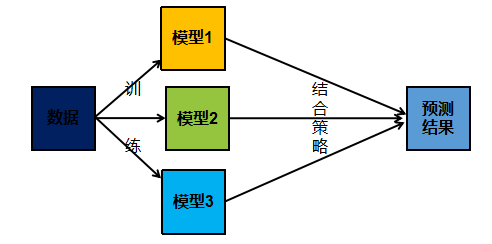

**集成学习**采取**投票**的方式来**综合**多个简单模型的**结果**，按**bagging投票**思想，如下面例子：

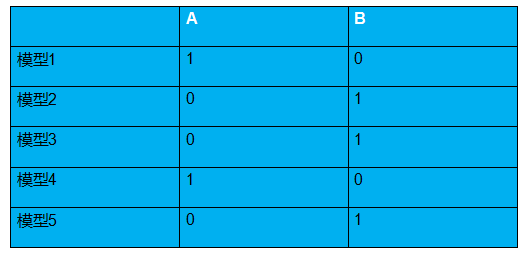

假设一共训练了5个简单模型，每个模型对分类结果预测如上图，则最终预测结果为：

A:2 
B:3 
3>2 
结果为B。

不过在有的时候，每个模型对分类结果的确定性不一样，即有的对分类结果非常肯定，有的不是很肯定,说明每个模型投的一票应该是有相应的**权重**来衡量这一票的重要性。就像在歌手比赛中，每个观众投的票记 1分，而专家投票记10分。按boosting投票思想，如下例：

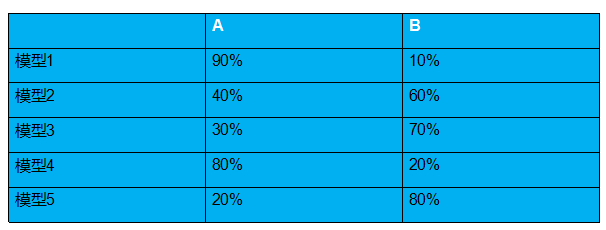

A：(0.9+0.4+0.3+0.8+0.2)/5=0.52。
B：(0.1+0.6+0.7+0.2+0.8)/5=0.48。
0.52 > 0.48。
结果为A。

### Boosting

**提升**方法基于这样一种**思想**：对于一个复杂任务来说，将多个专家的判断进行适当的**综合**所得出的判断，要比其中任何一个专家单独的判断好。

历史上， Kearns和Valiant 首先提出了**强可学习**和**弱可学习**的概念。指出：在**PAC**（可能近似正确，Probably Approximately Correct）学习的框架中，一个概念，如果**存在**一个**多项式的学习算法**能够学习它，并且**正确率很高**，那么就称这个概念是**强可学习**的；一个概念，如果存在一个**多项式的学习算法**能够学习它，学习的**正确率仅比随机猜测略好**，那么就称这个概念是**弱可学习**的。非常有趣的是Schapire后来证明强可学习与弱可学习是等价的，也就是说，在PAC学习的框架下，一个概念是**强可学习**的**充分必要条件**是这个概念是**弱可学习**的。

这样一来，问题便成为，在学习中，如果已经发现了弱学习算法，那么能否将它提升为强学习算法。大家知道，发现弱学习算法通常要比发现强学习算法容易得多。那么**如何**具体实施**提升**，便成为开发提升方法时所要解决的问题。

与bagging不同， **boosting**采用的是一个**串行训练**的方法。首先，它训练出一个弱分类器，然后在此基础上，再训练出一个稍好点的弱分类器，以此类推，不断的训练出多个弱分类器，最终再将这些分类器相结合，这就是boosting的基本思想（**逐层增强**），流程如下图：

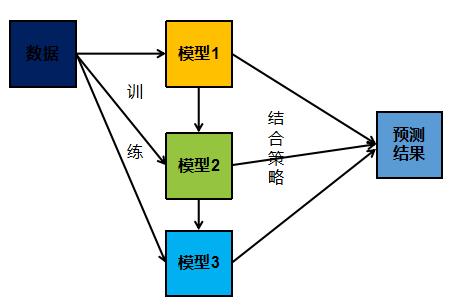

可以看出，**子模型**之间存在**强依赖**关系，必须**串行**生成。 **boosting**是利用不同**模型**的**相加**，**构成**一个**更好**的**模型**，求取模型一般都采用**序列化**方法，后面的模型依据前面的模型。

## 2. Adaboost算法

### Adaboost算法原理

对**提升**方法来说，有两个问题需要回答：一是在**每一轮如何改变训练数据的权值或概率分布**；二是**如何将弱分类器组合成一个强分类器**。关于第1个问题，AdaBoost的做法是，**提高**那些被**前一轮弱分类器错误分类样本的权值**，而**降低**那些被**正确分类样本的权值**。这样一来，那些没有得到正确分类的数据，由于其权值的加大而受到后一轮的弱分类器的更大关注。于是，分类问题被一系列的弱分类器“**分而治之**”。至于第2个问题，即弱分类器的组合，AdaBoost采取**加权多数表决**的方法，**加大分类误差率小的弱分类器的权值**（常胜者更有发言权），使其在表决中起较大的作用，**减小分类误差率大的弱分类器的权值**（失败者少说话），使其在表决中起较小的作用。

### Adaboost算法流程

**AdaBoost**是AdaptiveBoost的缩写，表明该算法是**具有适应性**的**提升算法**。

算法的步骤如下：

1. 给每个训练样本$(x_1,x_2,\ldots,x_N)$分配权重，初始权重$w_1$均为$1/N$；
2. 针对带有权值的样本进行训练，得到模型$G_m$（初始模型为G_1）；
3. 计算模型$G_m$的误分率：
   $$
   e_m = \sum_i^N w_i I(y_i \neq G_M(X_i))
   $$
   其中：$I(y_i \neq G_M(X_i)$ 为指示函数，表示括号中的条件成立时函数值为1，否则为0
4. 计算模型$G_m$的系数：
   $$
   \alpha_m = \frac{1}{2} log[\frac{1-e_m}{e_m}]
   $$
5. 根据$G_m$系数和当前权重向量$w_m$更新权重向量：
   $$
   w_{m+1,i} = \frac{w_m}{z_m} exp(-\alpha_m y_i G_m(x_i))
   $$
   其中，$z_m$为规范化因子：
   $$
   z_m = \sum_{i=1}^m w_{mi} exp(-\alpha_m y_i G_m(x_i))
   $$
6. 计算组合模型$f(x)=\sum_{m=1}^M \alpha_m G_m(x_i)$的误分率；
7. 当组合模型的误分率或迭代次数低于一定阈值，停止迭代；否则，回到步骤2。

## 3. sklearn中的Adaboost分类器

### 任务描述

用sklearn中的Adaboost分类器，通过鸢尾花数据集对Adaboost模型进行训练，并对未知的鸢尾花进行分类。
### 相关知识

为了完成本任务，需要掌握：

1. AdaBoostClassifier

#### 数据集介绍

数据集为鸢尾花（iris）数据，一共有150个样本，每个样本有4个特征，由于**Adaboost**是一个**串行**的迭代**二分类**算法，**运算成本较大**，为了减轻运算成本，我们只利用其中两个特征与两种类别构造训练模型，且adaboost算法返回的值为1与-1，所以要将标签为0的数据改为-1。代码如下：

In [24]:
import pandas as pd
from sklearn.datasets import load_iris
#获取并处理鸢尾花数据
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    #将标签为0的数据标签改为-1
    for i in range(len(data)):
        if data[i,-1] == 0:
            data[i,-1] = -1
    return data[:,:2], data[:,-1]

#### AdaBoostClassifier

sklearn中的Adaboost分类器为`AdaBoostClassifier`，其构造函数中有四个常用的参数可以设置：

- `algorithm` ：这个参数只有`AdaBoostClassifier`有。主要原因是scikit-learn实现了两种 Adaboost分类算法， SAMME和SAMME.R。两者的主要区别是弱学习器权重的度量， SAMME.R使用了概率度量的连续值，迭代一般比SAMME快，因此AdaBoostClassifie 的默认算法algorithm 的值也是 SAMME.R；

- `n_estimators`：弱学习器的最大迭代次数。一般来说`n_estimators`太小，容易欠拟合，`n_estimators`太大，又容易过拟合，一般选择一个适中的数值。默认是50；

- `learning_rate`：`AdaBoostClassifier`和`AdaBoostRegressor`都有，即每个弱学习器的权重缩减系数ν，默认为1.0；

- `base_estimator`：弱分类学习器或者弱回归学习器。理论上可以选择任何一个分类或者回归学习器，不过需要支持样本权重。我们常用的一般是CART决策树或者神经网络MLP。

和`sklearn`中其他分类器一样，`AdaBoostClassifier`类中的`fit`函数用于训练模型。`fit`函数有两个向量输入：

- `X` ：大小为**`(样本数量,特征数量)`** 的`ndarray`，存放训练样本；

- `Y`：值为整型，大小为**`(样本数量)`** 的 `ndarray`，存放训练样本的分类标签。

`AdaBoostClassifier`类中的`predict`函数用于预测，返回预测标签,`predict`函数有一个向量输入：

- `X`：大小为**`(样本数量,特征数量)`** 的`ndarray`，存放预测样本

### 实操练习

#### 编程要求

在 begin-end 区域内填写ada_classifier(train_data,train_label,test_data)函数完成对鸢尾花数据进行分类。其中：

- `X_train`：训练样本
- `y_train`：训练标签
- `X_test`：测试样本

#### 测试说明

输出预测正确率，应高于0.95

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def ada_classifier(X_train, y_train, X_test):
    '''
    input:X_train(ndarray):训练数据
          y_train(ndarray):训练标签
          X_test(ndarray):测试标签
    output:predict(ndarray):预测结果
    '''
    #********* Begin *********#
    ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier
           (max_depth=2, min_samples_split=10, min_samples_leaf=5),
            n_estimators=50,learning_rate=0.2)
    ada.fit(X_train, y_train)
    predict = ada.predict(X_test)
    #********* End *********# 
    return predict

In [26]:
# 测试代码
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 获取数据
X, y = create_data()
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=1
)
# 分类（预测）
y_pred = ada_classifier(X_train, y_train, X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.95